In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Height-Weight Data.csv")

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Data')

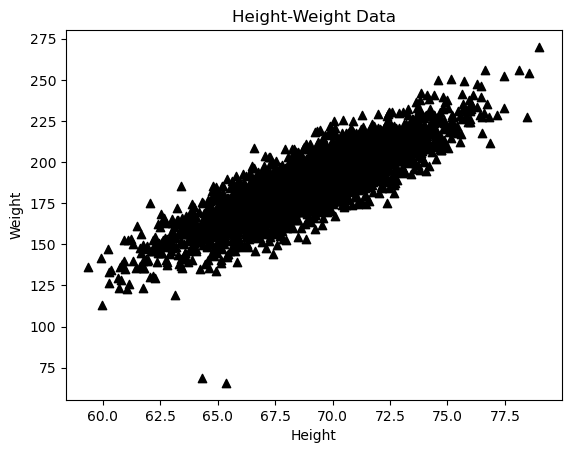

In [5]:
plt.scatter(df.Height, df.Weight, color ='black', marker ='^')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Data')

In [6]:
x= df.drop('Weight', axis = 1)
y= df[['Weight']]

In [7]:
x.head() #seperate height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head()#seperate weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
x.shape #data size

(3501, 1)

In [10]:
y.shape #data size

(3501, 1)

In [11]:
x.mean() #calculate the dataframe of height

Height    69.024411
dtype: float64

In [12]:
y.mean() #calculate the dataframe of weight

Weight    186.891258
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, train_size= .75)# trainig data 75%

In [15]:
train.shape

(2625, 2)

In [16]:
test.shape

(876, 2)

In [17]:
train.head()

,Height,Weight
267,70.929125,203.370463
966,73.187949,204.103817
2006,65.057181,150.580878
3201,65.357759,158.043230
2161,67.438047,173.230660


# Seperate

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size= .75,random_state = 13) #Here the height and weight data are seperated.This is the best way ti split data for training and testing.

In [19]:
xtrain.head()

,Height
2519,73.075657
3392,70.976491
2849,66.778724
596,65.667554
2815,67.075852


In [20]:
ytrain.head()

,Weight
2519,203.809263
3392,199.809881
2849,158.715870
596,174.566856
2815,203.493687


# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr

LinearRegression()

In [24]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [25]:
c = lr.intercept_
c

array([-224.41126092])

In [26]:
m = lr.coef_
m

array([[5.95863046]])

In [27]:
yp = (m*70)+c
yp

array([[192.69287155]])

In [28]:
lr.predict([[70]])#prediction of height

array([[192.69287155]])

In [29]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [30]:
df['Predicted_weight'] = lr.predict(x)

In [31]:
df.head()

,Height,Weight,Predicted_weight
0,73.847017,241.893563,215.615824
1,68.781904,162.310473,185.434688
2,74.110105,212.740856,217.183471
3,71.730978,220.042470,203.007132
4,69.881796,206.349801,191.988537


Text(0.5, 1.0, 'Height-Weight Linear Model')

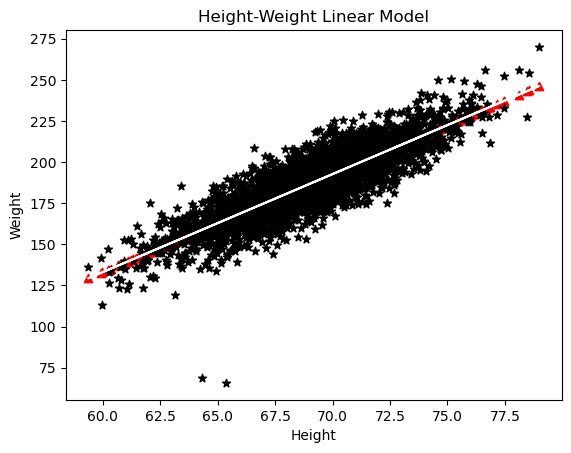

In [32]:
plt.plot(x,df[['Predicted_weight']], color ='white')
plt.scatter(x,df[['Predicted_weight']], color='red',marker='^')
plt.scatter(x,df[['Weight']], marker = '*',color= "black")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Linear Model')

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
mae = mean_absolute_error(ytest, lr.predict(xtest))
mse = mean_squared_error(ytest, lr.predict(xtest))

In [35]:
mae

8.16673172078983

In [36]:
mse

102.71533254404957

In [37]:
lr.score(xtest, ytest)

0.7277106323837144

Text(0, 0.5, 'Weight')

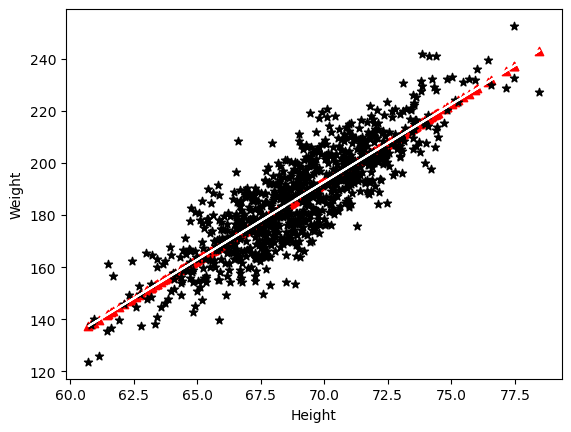

In [40]:
plt.plot(xtest, lr.predict(xtest), color = 'white')
plt.scatter(xtest,lr.predict(xtest),color='red', marker = '^')
plt.scatter(xtest,ytest, marker = '*',color = 'black')
plt.xlabel('Height')
plt.ylabel('Weight')